## **Identifying Fraudulent Transactions:**  

#### **Objective of the Project:**
- The Objective of this project is to build a Predictive model to determine whether a given transaction will be fraudulent or not.
- Identifying fraudulent transaction is crucial for Financial and Banking domains to reduce financial loss and to improve customer satisfaction.


**Business Goal:**
- Maximize fraud detection (recall) without too many false positives (precision trade-off).
- Handle time-based anomalies (multi-swipes or reversals within short intervals).


Importing the jsonlines library because the data is in text format, specifically structured as JSONLines (where each line is a valid JSON object). The jsonlines library allows me to efficiently read and process this type of data line by line, which is particularly useful for large datasets.

In [ ]:
!pip install jsonlines


In [ ]:
!pip install xgboost


This line loads line delimited JSON data from a txt file where each line is a JSON object which handles invalid lines gracefully, and converts the cleaned data into a structured pandas dataFrame for analysis.

Useful when Processing large datasets like logs and transactions.  

In [ ]:
import jsonlines
import pandas as pd
from datetime import datetime
import sys
print(sys.executable)

data = []

with jsonlines.open("/content/transactions data.txt") as reader:
  for obj in reader.iter(skip_invalid=True): # Used Skip_invalid as True to ignore any error related to extra characters after valid JSON Object
    data.append(obj)

data = pd.DataFrame(data)
data

/usr/bin/python3


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52764,246251253,246251253,5000.0,2172.06,2016-04-30T09:31:00,21.56,alibaba.com,US,US,05,...,,2827.94,,,,False,,,False,False
52765,246251253,246251253,5000.0,2150.50,2016-04-30T10:13:30,737.14,ebay.com,US,US,02,...,,2849.50,,,,False,,,False,False
52766,246251253,246251253,5000.0,1413.36,2016-04-30T10:16:24,211.92,gap.com,US,US,05,...,,3586.64,,,,False,,,False,False
52767,246251253,246251253,5000.0,1201.44,2016-04-30T10:27:06,354.54,Wendys #106537,US,US,02,...,,3798.56,,,,True,,,False,False


## **Exploring the data set:**

### **1.Exploratory Data Analysis Phase:**  

In [ ]:
print(data.info())  # Print a summary of the DataFrame (columns, types, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52769 entries, 0 to 52768
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             52769 non-null  object 
 1   customerId                52769 non-null  object 
 2   creditLimit               52769 non-null  float64
 3   availableMoney            52769 non-null  float64
 4   transactionDateTime       52769 non-null  object 
 5   transactionAmount         52769 non-null  float64
 6   merchantName              52769 non-null  object 
 7   acqCountry                52769 non-null  object 
 8   merchantCountryCode       52769 non-null  object 
 9   posEntryMode              52769 non-null  object 
 10  posConditionCode          52769 non-null  object 
 11  merchantCategoryCode      52769 non-null  object 
 12  currentExpDate            52769 non-null  object 
 13  accountOpenDate           52769 non-null  object 
 14  dateOf

Transaction dataset has total of **289230** entries and  with total of **29** coulmns/features with different datatypes.
  

#### **Missing Values**:

The dataset was checked for missing values using the isnull().sum() method, which returns the count of null entries for each column.

There are no missing values in any column and each column has complete data across all 786,363 records.

In [ ]:
# Check remaining missing values
missing_summary = data.isnull().sum()
print(missing_summary)

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64


In [ ]:
# Count unique values in each column
unique_counts = data.nunique()

# Display the result
print("Unique value count per column:")
print(unique_counts)

Unique value count per column:
accountNumber                 367
customerId                    367
creditLimit                    10
availableMoney              46964
transactionDateTime         52726
transactionAmount           25666
merchantName                 2250
acqCountry                      5
merchantCountryCode             5
posEntryMode                    6
posConditionCode                4
merchantCategoryCode           19
currentExpDate                165
accountOpenDate               329
dateOfLastAddressChange       459
cardCVV                       396
enteredCVV                    562
cardLast4Digits               516
transactionType                 4
echoBuffer                      1
currentBalance              46570
merchantCity                    1
merchantState                   1
merchantZip                     1
cardPresent                     2
posOnPremises                   1
recurringAuthInd                1
expirationDateKeyInMatch        2
isFraud          

CurrentBalance, TransactionDatetime and Available_Money has highest unique values b/w (10,0000 - 14,0000). Followed by transaction_amount with approx 40,000 unique values. Lastly, Merchant_Name with 2300 and CardLast4digits with 1225 unique values.  

In [ ]:
# Data Structure and Summary
print("Number of records:", data.shape[0])
print("Number of fields per record:", data.shape[1])

Number of records: 91986
Number of fields per record: 49


In [ ]:
# Show unique values for each column (first 10 values only to keep output readable)
for col in data.columns:
    print(f"\nColumn: {col}")
    print(data[col].unique()[:10])  # Shows only first 10 unique values



Column: accountNumber
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: customerId
['737265056' '830329091' '574788567' '924729945' '984504651' '114896048'
 '482277829' '239577603' '863358589' '711536931']

Column: creditLimit
[ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]

Column: availableMoney
[5000.   4990.63 4959.25 4918.5  4877.75 2500.   2469.92 2428.67 2304.46
 2108.39]

Column: transactionDateTime
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39'
 '2016-12-10T02:14:50' '2016-03-24T21:04:46' '2016-04-19T16:24:27'
 '2016-05-21T14:50:35' '2016-06-03T00:31:21' '2016-06-10T01:21:46'
 '2016-07-11T10:47:16']

Column: transactionAmount
[ 98.55  74.51   7.47  71.18  30.76  57.28   9.37 523.67 164.37 160.18]

Column: merchantName
['Uber' 'AMC #191138' 'Play Store' 'Tim Hortons #947751'
 'In-N-Out #422833' 'Krispy Kreme #685312' 'Shake Shack #968081'
 'Burger King 

Below, I've compared  the two columns AccountNumber and CustomerId element-wise across all rows.

Returns True if they are exactly the same (including order, values, and data types).

Since the columns are identical, keeping both is redundant.
Removes customerId to avoid duplication, reduce memory usage, and improve dataset clarity.

In [ ]:
# Display the first few rows of Customer_Id and Account_Number Columns
print("First few rows of Customer_Id and Account_Number:")
print(data[['customerId', 'accountNumber']].head())

# Check if the columns are identical
are_identical = data['customerId'].equals(data['accountNumber'])
print(f"Are 'customerId' and 'accountNumber' identical? {are_identical}")
data[['customerId', 'accountNumber']].tail()

data = data.drop(columns=['customerId'])

First few rows of Customer_Id and Account_Number:
  customerId accountNumber
0  737265056     737265056
1  737265056     737265056
2  737265056     737265056
3  737265056     737265056
4  830329091     830329091
Are 'customerId' and 'accountNumber' identical? True


Several columns were found to contain only empty strings. These columns are removed from our analysis as they offer no analytical value.


In [ ]:
empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))
empty_counts_sum = empty_counts.sum()
print(empty_counts_sum[empty_counts_sum > 0])  # Only show columns with empty strings

/tmp/ipython-input-4026827446.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_counts = (data == '') | (data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))


acqCountry               290
merchantCountryCode       47
posEntryMode             295
posConditionCode          30
transactionType           45
echoBuffer             52769
merchantCity           52769
merchantState          52769
merchantZip            52769
posOnPremises          52769
recurringAuthInd       52769
dtype: int64


In [ ]:
cols_to_drop = [
    'echoBuffer', 'merchantCity', 'merchantState',
    'merchantZip', 'posOnPremises', 'posConditionCode',  'recurringAuthInd'
]
data = data.drop(columns=cols_to_drop)

In [ ]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Count them
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}\n")

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")


Number of categorical columns: 14
Categorical columns: ['accountNumber', 'transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType']

Number of numerical columns: 4
Numerical columns: ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']


lets check if we can convert some object coulmns to numeric as object dataype takes more processing time and reduces speed of our analysis.

In [ ]:
# List of columns that can be converted to numeric
convertible_cols = ['accountNumber', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

# Convert these columns to numeric type (will raise error if invalid data found)
for col in convertible_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Non-numeric values become NaN


Now its converted and will make our analysis more smooth, lets check now how many categorical and numerical coulmns we have and what are the data types?

In [ ]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Count them
print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}\n")

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")

Number of categorical columns: 10
Categorical columns: ['transactionDateTime', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionType']

Number of numerical columns: 8
Numerical columns: ['accountNumber', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']


In [ ]:
data_chiSquare = data.copy()

I've made a copy of my data to run a Chi-Square test. The Chi-Square test helps identify which categorical features are statistically significant in relation to the target variable. It tells us whether the association between a feature and the target is likely due to chance or not. A low p-value indicates that the relationship is statistically significant and not random.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_cols = ['merchantName', 'acqCountry', 'merchantCountryCode',
                    'posEntryMode', 'merchantCategoryCode', 'transactionType']

# Step 1: Fill NA if any
data_chiSquare[categorical_cols] = data_chiSquare[categorical_cols].fillna('Unknown')

results = []
for col in categorical_cols:
    ct = pd.crosstab(data_chiSquare[col], data_chiSquare['isFraud'])
    chi2_stat, p, dof, expected = chi2_contingency(ct, correction=False)
    results.append((col, chi2_stat, p, dof))

chi2_results = (pd.DataFrame(results, columns=['Feature', 'Chi2_Score', 'P_Value', 'DOF'])
                .sort_values('P_Value')
                .reset_index(drop=True))

print("📊 Chi-Square per feature (contingency table):")
print(chi2_results)

📊 Chi-Square per feature (contingency table):
                Feature   Chi2_Score       P_Value   DOF
0  merchantCategoryCode   299.978483  4.865139e-53    18
1          posEntryMode   169.738900  8.294878e-35     5
2          merchantName  3082.481550  2.957642e-29  2249
3   merchantCountryCode    63.144880  6.325775e-13     4
4            acqCountry     8.968052  6.190300e-02     4
5       transactionType     5.437985  1.423952e-01     3



We may drop or group high-cardinality features (merchantName), as this is with very high cardinality can look very important but may not generalize well.

Prioritize features with strong scores and interpretability (posEntryMode, merchantCategoryCode, merchantCountryCode).

Similary, transactionType and acqCountry is having good scores and are interpretable.

In [ ]:
cols_to_drop = ['acqCountry']

data.drop(columns=cols_to_drop, inplace=True)

In [ ]:
# Convert to datetime format
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], errors='coerce')

# Extract relevant fraud detection features
data['trans_hour'] = data['transactionDateTime'].dt.hour                  # Hour of day
data['trans_weekday'] = data['transactionDateTime'].dt.dayofweek           # 0 = Monday, 6 = Sunday
data['trans_month'] = data['transactionDateTime'].dt.month                # Month

# Calculate time since last transaction for each account
data = data.sort_values(by=['accountNumber', 'transactionDateTime'])
data['time_since_last_txn'] = data.groupby('accountNumber')['transactionDateTime'].diff().dt.total_seconds()

data['txn_date'] = data['transactionDateTime'].dt.date
txn_count = data.groupby(['accountNumber','txn_date'])['txn_date'].transform('count')

# Assign the calculated daily transaction count to a new column
data['daily_txn_count'] = txn_count

print(data[['accountNumber','transactionDateTime','txn_date','daily_txn_count']].head(10))

      accountNumber transactionDateTime    txn_date  daily_txn_count
2964      101380713 2016-01-02 05:10:39  2016-01-02                1
2965      101380713 2016-01-04 03:10:44  2016-01-04                1
2966      101380713 2016-01-11 18:00:07  2016-01-11                1
2967      101380713 2016-01-15 20:46:39  2016-01-15                1
2968      101380713 2016-01-16 00:46:06  2016-01-16                1
2969      101380713 2016-01-17 11:00:58  2016-01-17                1
2970      101380713 2016-01-26 05:15:57  2016-01-26                1
2971      101380713 2016-02-02 03:40:40  2016-02-02                1
2972      101380713 2016-02-08 16:22:35  2016-02-08                1
2973      101380713 2016-02-18 04:47:03  2016-02-18                1


In [ ]:
data

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCountryCode,posEntryMode,merchantCategoryCode,currentExpDate,...,cardPresent,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,time_since_last_txn,txn_date,daily_txn_count,validity_days
2964,101380713,10000.0,10000.00,2016-01-02 05:10:39,114.65,cheapfast.com,US,02,online_retail,2026-11-01,...,False,False,False,5,5,1,NaN,2016-01-02,1,4171
2965,101380713,10000.0,9885.35,2016-01-04 03:10:44,433.50,Fast Repair,US,09,auto,2028-04-01,...,True,False,False,3,0,1,165605.0,2016-01-04,1,4688
2966,101380713,10000.0,9451.85,2016-01-11 18:00:07,0.46,walmart.com,US,05,online_retail,2032-10-01,...,False,False,False,18,0,1,658163.0,2016-01-11,1,6332
2967,101380713,10000.0,9451.39,2016-01-15 20:46:39,9.17,Eazy Tire,US,02,auto,2029-11-01,...,True,False,False,20,4,1,355592.0,2016-01-15,1,5267
2968,101380713,10000.0,9442.22,2016-01-16 00:46:06,50.43,oldnavy.com,US,05,online_retail,2022-01-01,...,False,False,False,0,5,1,14367.0,2016-01-16,1,2406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,996362843,1000.0,717.38,2016-12-28 10:13:49,107.48,Popeyes #255300,US,05,fastfood,2026-11-01,...,True,False,False,10,2,12,58420.0,2016-12-28,1,5131
7781,996362843,1000.0,609.90,2016-12-29 04:28:26,12.70,sears.com,US,05,online_retail,2031-12-01,...,False,False,False,4,3,12,65677.0,2016-12-29,3,6987
7782,996362843,1000.0,597.20,2016-12-29 06:27:42,48.58,Popeyes #580764,US,05,fastfood,2021-04-01,...,True,False,False,6,3,12,7156.0,2016-12-29,3,3091
7783,996362843,1000.0,548.62,2016-12-29 19:29:21,25.86,oldnavy.com,US,09,online_retail,2020-01-01,...,False,False,False,19,3,12,46899.0,2016-12-29,3,2635


In [ ]:
import pandas as pd

# Convert to datetime
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], errors='coerce')
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'], format='%m/%Y', errors='coerce') # Specify the format for currentExpDate


# Create validity in days
data['validity_days'] = (
    data['currentExpDate'] - data['accountOpenDate']
).dt.days

# Drop original columns
data_new = data.drop(columns=['accountOpenDate', 'currentExpDate', 'dateOfLastAddressChange'])

print("Validity feature created and original columns removed")
print(data_new[['validity_days']].head())

Validity feature created and original columns removed
      validity_days
2964           4171
2965           4688
2966           6332
2967           5267
2968           2406


In [ ]:
data_new

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,merchantCountryCode,posEntryMode,merchantCategoryCode,cardCVV,...,cardPresent,expirationDateKeyInMatch,isFraud,trans_hour,trans_weekday,trans_month,time_since_last_txn,txn_date,daily_txn_count,validity_days
2964,101380713,10000.0,10000.00,2016-01-02 05:10:39,114.65,cheapfast.com,US,02,online_retail,551,...,False,False,False,5,5,1,NaN,2016-01-02,1,4171
2965,101380713,10000.0,9885.35,2016-01-04 03:10:44,433.50,Fast Repair,US,09,auto,551,...,True,False,False,3,0,1,165605.0,2016-01-04,1,4688
2966,101380713,10000.0,9451.85,2016-01-11 18:00:07,0.46,walmart.com,US,05,online_retail,551,...,False,False,False,18,0,1,658163.0,2016-01-11,1,6332
2967,101380713,10000.0,9451.39,2016-01-15 20:46:39,9.17,Eazy Tire,US,02,auto,551,...,True,False,False,20,4,1,355592.0,2016-01-15,1,5267
2968,101380713,10000.0,9442.22,2016-01-16 00:46:06,50.43,oldnavy.com,US,05,online_retail,551,...,False,False,False,0,5,1,14367.0,2016-01-16,1,2406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,996362843,1000.0,717.38,2016-12-28 10:13:49,107.48,Popeyes #255300,US,05,fastfood,367,...,True,False,False,10,2,12,58420.0,2016-12-28,1,5131
7781,996362843,1000.0,609.90,2016-12-29 04:28:26,12.70,sears.com,US,05,online_retail,367,...,False,False,False,4,3,12,65677.0,2016-12-29,3,6987
7782,996362843,1000.0,597.20,2016-12-29 06:27:42,48.58,Popeyes #580764,US,05,fastfood,367,...,True,False,False,6,3,12,7156.0,2016-12-29,3,3091
7783,996362843,1000.0,548.62,2016-12-29 19:29:21,25.86,oldnavy.com,US,09,online_retail,367,...,False,False,False,19,3,12,46899.0,2016-12-29,3,2635


In [ ]:
# List of categorical columns
categorical_cols = data_new.select_dtypes(include=['object']).columns

# Fraud rate per category
for col in categorical_cols:
    print(f"\nMean Fraud Rate by '{col}':")
    print(data_new.groupby(col)['isFraud'].mean().sort_values(ascending=False))



Mean Fraud Rate by 'merchantName':
merchantName
In-N-Out #567597     0.75
In-N-Out #463194     0.60
Quizno's #604182     0.50
Hardee's #398938     0.50
Walgreens #215972    0.50
                     ... 
AMC #79863           0.00
In-N-Out #949129     0.00
AMC #74121           0.00
AMC #606218          0.00
In-N-Out #722754     0.00
Name: isFraud, Length: 2250, dtype: float64

Mean Fraud Rate by 'merchantCountryCode':
merchantCountryCode
       0.148936
PR     0.033898
US     0.014268
MEX    0.013216
CAN    0.012270
Name: isFraud, dtype: float64

Mean Fraud Rate by 'posEntryMode':
posEntryMode
      0.054237
09    0.021633
02    0.016285
80    0.014388
90    0.013846
05    0.007300
Name: isFraud, dtype: float64

Mean Fraud Rate by 'merchantCategoryCode':
merchantCategoryCode
personal care           0.043592
rideshare               0.029829
furniture               0.028112
online_retail           0.018605
online_gifts            0.017216
airline                 0.016474
fastfood        

In [ ]:
# Convert all boolean columns to 1/0
df = data_new.copy()
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))

In [63]:
df

# Drop original columns
df_new = df.drop(columns=['time_since_last_txn'])

KeyError: "['time_since_last_txn'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Columns
categorical_cols = ["merchantName", "merchantCountryCode", "posEntryMode", "merchantCategoryCode"]

# Fill missing values
df_new[categorical_cols] = df_new[categorical_cols].fillna("Unknown")

# 1. Frequency Encoding for merchantName
freq_enc = df_new['merchantName'].value_counts().to_dict()
df_new['merchantName_FE'] = df_new['merchantName'].map(freq_enc)

# 2. Label Encoding for other three
le_dict = {}  # keep encoders if you need inverse_transform later
for col in ["merchantCountryCode", "posEntryMode", "merchantCategoryCode","transactionType"]:
    le = LabelEncoder()
    df_new[col + "_LE"] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

print("Encoding complete!")
print(df_new[['merchantName', 'merchantName_FE',
          'merchantCountryCode', 'merchantCountryCode_LE',
          'posEntryMode', 'posEntryMode_LE',
          'merchantCategoryCode', 'merchantCategoryCode_LE']].head())



Encoding complete!
       merchantName  merchantName_FE merchantCountryCode  \
2964  cheapfast.com             1276                  US   
2965    Fast Repair              103                  US   
2966    walmart.com             1330                  US   
2967      Eazy Tire              101                  US   
2968    oldnavy.com             1405                  US   

      merchantCountryCode_LE posEntryMode  posEntryMode_LE  \
2964                       4           02                1   
2965                       4           09                3   
2966                       4           05                2   
2967                       4           02                1   
2968                       4           05                2   

     merchantCategoryCode  merchantCategoryCode_LE  
2964        online_retail                       14  
2965                 auto                        1  
2966        online_retail                       14  
2967                 auto          

In [ ]:
Cleaned_df = df_new.drop(columns=["merchantName", "merchantCountryCode", "posEntryMode", "merchantCategoryCode", "transactionType"])

In [ ]:
Cleaned_df

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,...,trans_weekday,trans_month,txn_date,daily_txn_count,validity_days,merchantName_FE,merchantCountryCode_LE,posEntryMode_LE,merchantCategoryCode_LE,transactionType_LE
2964,101380713,10000.0,10000.00,2016-01-02 05:10:39,114.65,551,551,7553,0.00,0,...,5,1,2016-01-02,1,4171,1276,4,1,14,2
2965,101380713,10000.0,9885.35,2016-01-04 03:10:44,433.50,551,551,7553,114.65,1,...,0,1,2016-01-04,1,4688,103,4,3,1,2
2966,101380713,10000.0,9451.85,2016-01-11 18:00:07,0.46,551,551,7553,548.15,0,...,0,1,2016-01-11,1,6332,1330,4,2,14,2
2967,101380713,10000.0,9451.39,2016-01-15 20:46:39,9.17,551,551,7553,548.61,1,...,4,1,2016-01-15,1,5267,101,4,1,1,2
2968,101380713,10000.0,9442.22,2016-01-16 00:46:06,50.43,551,551,7553,557.78,0,...,5,1,2016-01-16,1,2406,1405,4,2,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,996362843,1000.0,717.38,2016-12-28 10:13:49,107.48,367,367,4949,282.62,1,...,2,12,2016-12-28,1,5131,10,4,2,4,2
7781,996362843,1000.0,609.90,2016-12-29 04:28:26,12.70,367,367,4949,390.10,0,...,3,12,2016-12-29,3,6987,1287,4,2,14,2
7782,996362843,1000.0,597.20,2016-12-29 06:27:42,48.58,367,367,4949,402.80,1,...,3,12,2016-12-29,3,3091,4,4,2,4,2
7783,996362843,1000.0,548.62,2016-12-29 19:29:21,25.86,367,367,4949,451.38,0,...,3,12,2016-12-29,3,2635,1405,4,3,14,2


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical columns only
num_cols = Cleaned_df.select_dtypes(include=['int64', 'float64']).columns

# Use numerical features only (exclude target)
X = Cleaned_df[num_cols].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     feature         VIF
1                creditLimit         inf
2             availableMoney         inf
7             currentBalance         inf
4                    cardCVV  568.747052
5                 enteredCVV  567.854836
17    merchantCountryCode_LE   82.623424
20        transactionType_LE   64.559854
19   merchantCategoryCode_LE   13.777058
15             validity_days    9.035902
18           posEntryMode_LE    6.396558
0              accountNumber    6.148801
16           merchantName_FE    5.174009
8                cardPresent    4.974630
13               trans_month    4.626043
6            cardLast4Digits    4.198310
11                trans_hour    3.718829
12             trans_weekday    3.236317
14           daily_txn_count    2.023968
3          transactionAmount    1.905446
10                   isFraud    1.022237
9   expirationDateKeyInMatch    1.003075


The VIF analysis indicates severe multicollinearity issues in the dataset.

Features such as **creditLimit, AvailableMoney, and CurrentBalance** exhibit perfect collinearity (VIF = ∞), suggesting that one is a linear combination of the others.

Similarly, **cardCVV and enteredCVV** show extremely high **VIF values (>100),** indicating **redundancy.**


To address this, we should consider dropping redundant features, keeping only one variable from highly correlated groups, or applying dimensionality reduction techniques.

Most other features fall within acceptable VIF ranges (<5 –10) and can be retained.

In [ ]:
df_vif = Cleaned_df.drop(columns=['cardCVV','merchantCountryCode_LE'])

In [ ]:
# Select numerical columns only from df_vif
num_cols_vif = df_vif.select_dtypes(include=['int64', 'float64']).columns

# Use numerical features only (exclude target)
X = df_vif[num_cols_vif].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     feature        VIF
1                creditLimit        inf
2             availableMoney        inf
6             currentBalance        inf
18        transactionType_LE  35.800592
17   merchantCategoryCode_LE  13.286738
14             validity_days   8.593319
16           posEntryMode_LE   6.187415
0              accountNumber   5.956160
15           merchantName_FE   5.173640
7                cardPresent   4.840743
4                 enteredCVV   4.778013
12               trans_month   4.497810
5            cardLast4Digits   4.151643
10                trans_hour   3.659567
11             trans_weekday   3.190128
13           daily_txn_count   1.947841
3          transactionAmount   1.905358
9                    isFraud   1.022006
8   expirationDateKeyInMatch   1.002973


The VIF values for all remaining numerical features are now significantly lower, with the highest VIF being around 6.41 for creditLimit.

This indicates that multicollinearity is no longer a major concern among these features.

Generally, VIF values below 10 (or even 5, depending on the context) are considered acceptable.

In [64]:
Cleaned_df.describe()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,...,trans_hour,trans_weekday,trans_month,daily_txn_count,validity_days,merchantName_FE,merchantCountryCode_LE,posEntryMode_LE,merchantCategoryCode_LE,transactionType_LE
count,5.276900e+04,52769.000000,52769.000000,52769,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,...,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000,52769.000000
mean,5.203478e+08,9461.573083,5641.265254,2016-06-27 19:27:59.340218880,137.669527,493.968315,493.887813,4469.103527,3820.307829,0.444996,...,11.492448,3.001421,6.377324,5.800622,4553.333112,631.317800,3.976331,2.160397,9.603385,1.998313
min,1.013807e+08,250.000000,-793.620000,2016-01-01 00:01:44,0.000000,101.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1437.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.689605e+08,5000.000000,976.360000,2016-03-25 01:28:00,33.990000,225.000000,225.000000,2701.000000,556.170000,0.000000,...,5.000000,1.000000,3.000000,1.000000,3238.000000,38.000000,4.000000,1.000000,4.000000,2.000000
50%,4.427997e+08,5000.000000,2698.450000,2016-06-25 23:14:58,87.790000,494.000000,494.000000,4186.000000,2282.460000,0.000000,...,11.000000,3.000000,6.000000,2.000000,4565.000000,252.000000,4.000000,2.000000,12.000000,2.000000
75%,7.309733e+08,15000.000000,6651.260000,2016-09-29 09:27:14,192.300000,719.000000,717.000000,6091.000000,4544.950000,1.000000,...,18.000000,5.000000,9.000000,6.000000,5797.000000,1295.000000,4.000000,3.000000,14.000000,2.000000
max,9.963628e+08,50000.000000,50000.000000,2016-12-30 23:38:05,1434.500000,995.000000,998.000000,9945.000000,47489.500000,1.000000,...,23.000000,6.000000,12.000000,53.000000,10053.000000,2084.000000,4.000000,5.000000,18.000000,3.000000
std,2.455195e+08,10382.535277,8663.860864,NaN,148.128851,268.265319,268.246601,2570.330557,5266.963906,0.496970,...,6.943642,1.999682,3.487226,7.640372,1607.542219,689.876624,0.246851,0.922813,5.327161,0.231864


### From the above statistical summary we can see infer below pointers:

Analyzing the dataset revealed several key insights into user behavior and financial patterns as stated below.

*Credit limit*

Wide range from 250 to 50,000 with a very high standard deviation → Indicates highly diverse customer profiles (low vs. premium accounts).
Could be important: fraudsters may target higher limits for bigger potential gain.

*AvailableMoney*

Has negative values, suggesting over-limit spending → might be a strong fraud signal.

Wide distribution: some customers have full limit available, others are in overdraft.
Highly correlated to both creditLimit and currentBalance.

*CurrentBalance*

Huge spread: 0 to 47,489
Important to see if fraud is more likely when balances are low or high (e.g., near limit).

This tells us fraud is less likely in very small-value transactions and has higher chances to occur in large amounts.

**Lets identify ranges where fraud rate increases for these four important coulmns**

In [59]:


# Define your columns of interest
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Set the step size for thresholds (adjust for granularity)
threshold_steps = 10  # percentiles from 10% to 90%

# Loop over each column
for col in cols_to_check:
    print(f"\n📊 Fraud Rate Analysis for: {col}")
    print("-" * 40)

    # Get min and max thresholds using percentiles
    for percentile in range(10, 100, threshold_steps):
        threshold = data[col].quantile(percentile / 100)

        fraud_rate_above = data[data[col] > threshold]['isFraud'].mean()
        fraud_rate_below = data[data[col] <= threshold]['isFraud'].mean()

        print(f"Threshold > {percentile}% ({threshold:.2f}) → Fraud Rate: {fraud_rate_above:.4f}")



📊 Fraud Rate Analysis for: creditLimit
----------------------------------------
Threshold > 10% (1000.00) → Fraud Rate: 0.0146
Threshold > 20% (2500.00) → Fraud Rate: 0.0141
Threshold > 30% (5000.00) → Fraud Rate: 0.0113
Threshold > 40% (5000.00) → Fraud Rate: 0.0113
Threshold > 50% (5000.00) → Fraud Rate: 0.0113
Threshold > 60% (7500.00) → Fraud Rate: 0.0106
Threshold > 70% (10000.00) → Fraud Rate: 0.0106
Threshold > 80% (15000.00) → Fraud Rate: 0.0110
Threshold > 90% (15000.00) → Fraud Rate: 0.0110

📊 Fraud Rate Analysis for: availableMoney
----------------------------------------
Threshold > 10% (277.16) → Fraud Rate: 0.0145
Threshold > 20% (726.93) → Fraud Rate: 0.0144
Threshold > 30% (1273.43) → Fraud Rate: 0.0147
Threshold > 40% (1966.43) → Fraud Rate: 0.0142
Threshold > 50% (2698.45) → Fraud Rate: 0.0140
Threshold > 60% (3856.17) → Fraud Rate: 0.0137
Threshold > 70% (5192.02) → Fraud Rate: 0.0119
Threshold > 80% (8121.11) → Fraud Rate: 0.0114
Threshold > 90% (13600.23) → Fraud 

Lets visualization all of these using graphs, where we analyzed fraud rates across thresholds for numerical features (CreditLimit, AvailableMoney, TransactionAmount and currentBalance).

Found a strong positive correlation between transactionAmount and fraud rate, indicating higher transaction values are more likely to be fraudulent.

CreditLimit and AvailableMoney showed less clear relationships.

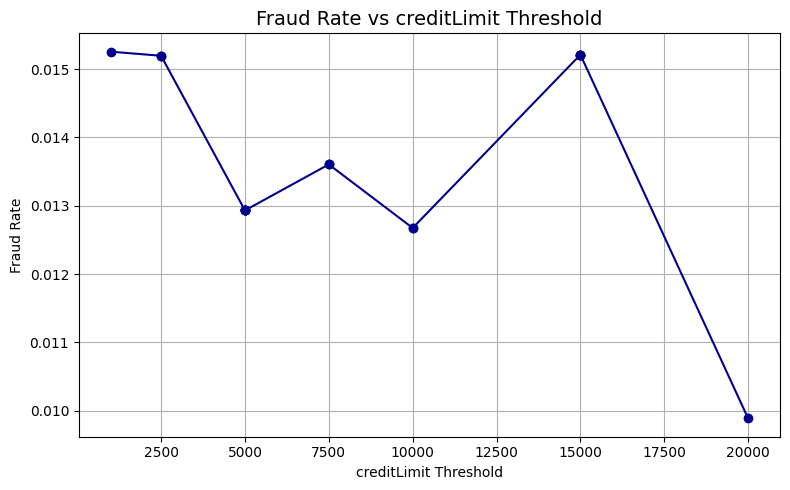

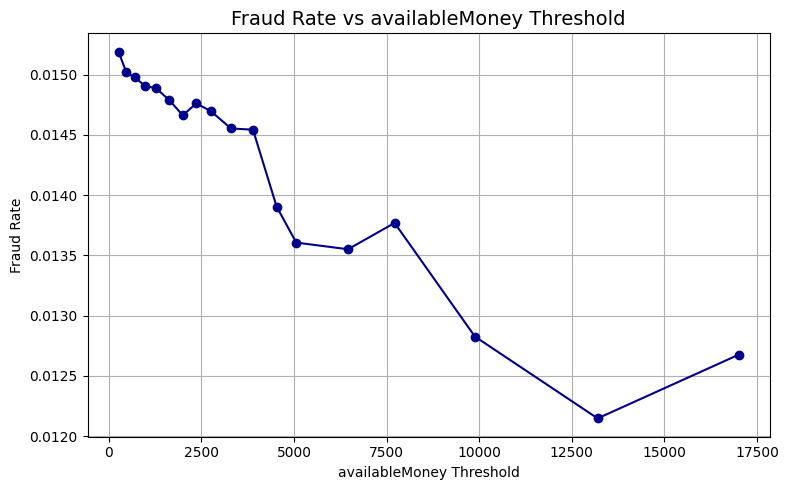

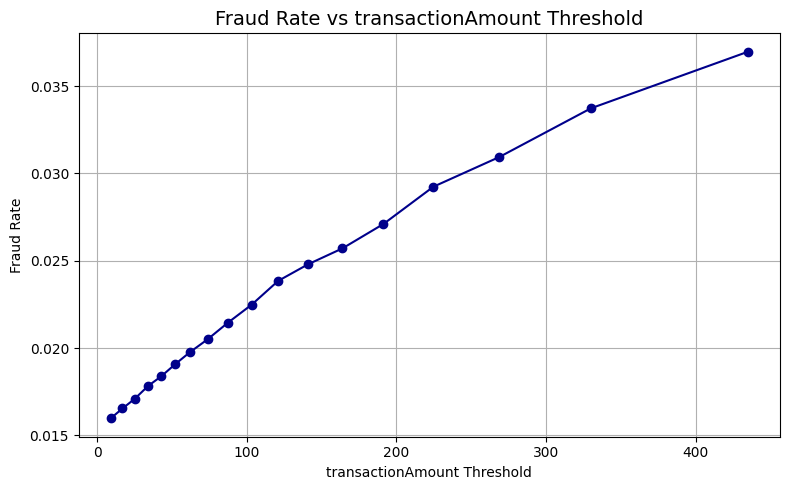

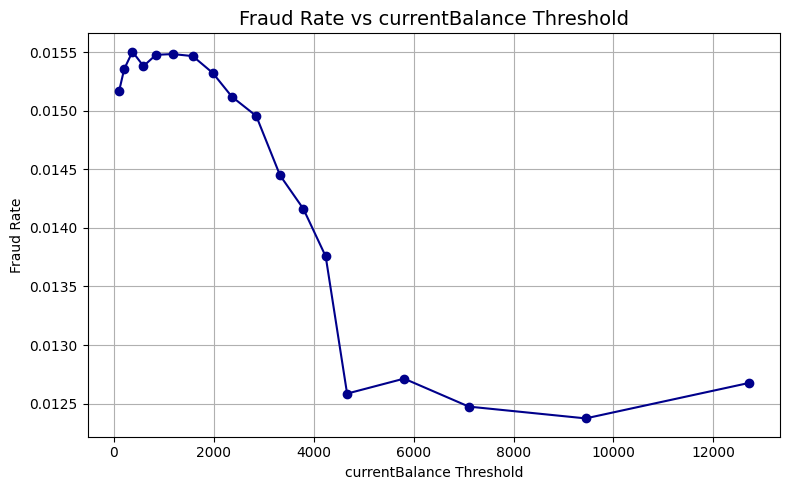

In [ ]:
import matplotlib.pyplot as plt

# Define columns to analyze
cols_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Percentiles for thresholding
percentiles = list(range(10, 100, 5))  # 10% to 95% in 5% steps

# Loop through each feature
for col in cols_to_check:
    fraud_rates = []
    thresholds = []

    for p in percentiles:
        threshold = data[col].quantile(p / 100)
        fraud_rate = data[data[col] > threshold]['isFraud'].mean()

        thresholds.append(threshold)
        fraud_rates.append(fraud_rate)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, fraud_rates, marker='o', linestyle='-', color='darkblue')
    plt.title(f'Fraud Rate vs {col} Threshold', fontsize=14)
    plt.xlabel(f'{col} Threshold')
    plt.ylabel('Fraud Rate')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
print("Unique values for merchantCategoryCode:")
print(df['merchantCategoryCode'].unique())

print("\nUnique values for merchantName:")
print(df['merchantName'].unique())

Unique values for merchantCategoryCode:
['fuel' 'rideshare' 'fastfood' 'online_retail' 'food' 'mobileapps'
 'online_subscriptions' 'entertainment' 'cable/phone' 'auto'
 'online_gifts' 'furniture' 'personal care' 'subscriptions' 'health'
 'food_delivery' 'hotels' 'airline' 'gym']

Unique values for merchantName:
['Shell Gas #494785' 'Lyft' "Quizno's #808797" ... 'Sprint PCS #40421'
 'Fast Mobile #238495' 'Virgin #807264']


### **Data Wrangling Phase - Duplicate transactions :**


One way to understand fraud is by identfying duplicate and reversed transactions using  merchant name, account numbers, location and time based patterns.

 One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal.

 Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

### **Lets Explore Reverse Transactions and see what patterns we find:**  

lets first see how many transactions types are actually reversal, their frequency count and total amount associated, it will help us in finding suspicious activies.

In [ ]:
#Reversed Transaction
reversed_transactions = df[df["transactionType"]=="REVERSAL"]
print("Number of reversed_transactions ", reversed_transactions.shape[0])
print("Total value of reversed_transactions ${}".format(round(sum(reversed_transactions.transactionAmount),2)))

Number of reversed_transactions  20303
Total value of reversed_transactions $2821792.5


A significant number of transactions (20,303) were reversed, indicating possible customer disputes or fraud detections. The total monetary value of these reversals is substantial ($2.82M), which could impact business operations and profitability.

- If this trend is recurring, it might warrant further investigation into the reasons behind these reversals.
- Are certain merchants or accounts frequently involved in reversals?
- Are specific transaction types or time periods more prone to reversals?

### **Top Merchants Frequently Involved in Reversals:**

Top Merchants Involved in Reversals:
merchantName
Lyft           692
Uber           689
alibaba.com    499
ebay.com       491
oldnavy.com    488
gap.com        484
amazon.com     477
staples.com    472
target.com     469
apple.com      460
Name: count, dtype: int64


/tmp/ipython-input-2710103406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')


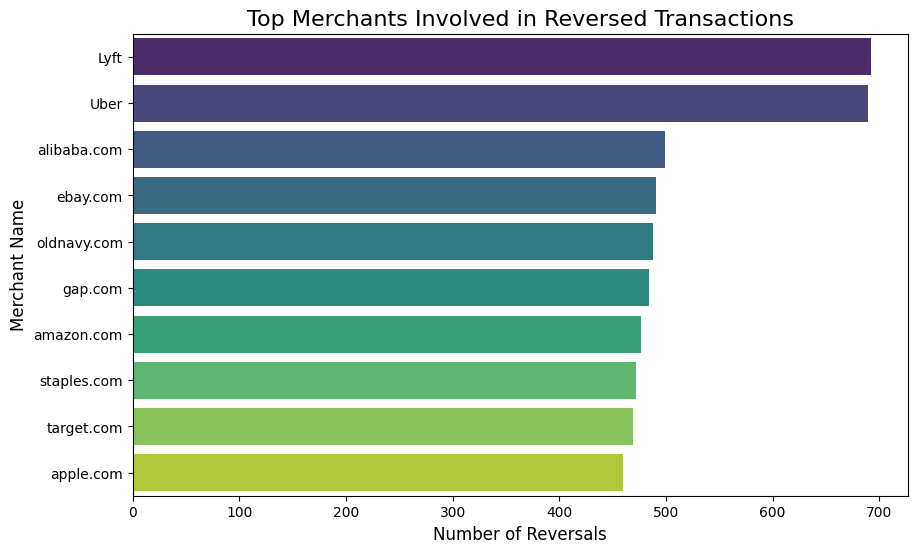

In [ ]:
top_merchants = reversed_transactions['merchantName'].value_counts().head(10)
print("Top Merchants Involved in Reversals:")
print(top_merchants)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette='viridis')
plt.title('Top Merchants Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Merchant Name', fontsize=12)
plt.show()

The table and bar plot highlight that Lyft and Uber account for the highest number of reversed transactions, followed closely by Alibaba.com and eBay.com. Meanwhile, other online retailers such as OldNavy.com, Gap.com, and Amazon.com show comparatively fewer reversals, though each still exceeds 400 transactions.

### **Top Accounts Frequently Involved in Reversals:**

Top Accounts Involved in Reversals:
accountNumber
380680241    907
882815134    384
570884863    300
246251253    277
369308035    211
894938833    181
832842201    177
724518977    173
419709514    171
208319653    148
Name: count, dtype: int64


/tmp/ipython-input-587953256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')


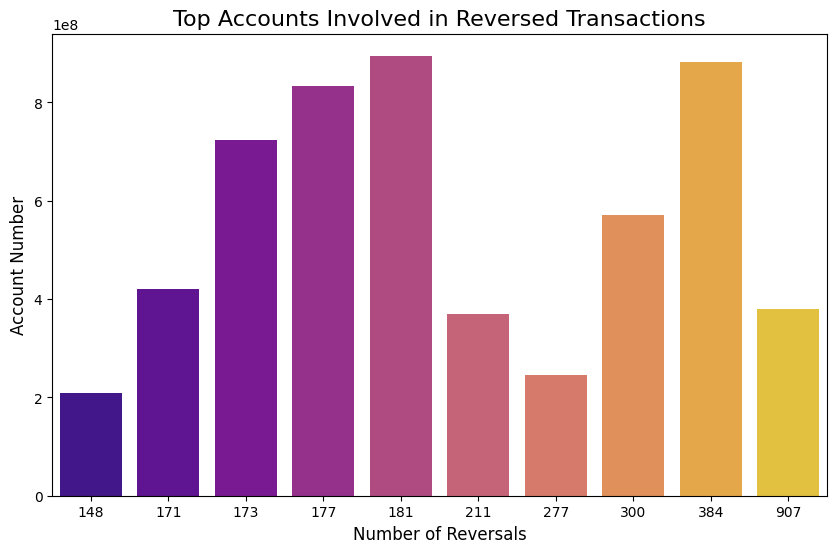

In [ ]:
top_accounts = reversed_transactions['accountNumber'].value_counts().head(10)
print("Top Accounts Involved in Reversals:")
print(top_accounts)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='plasma')
plt.title('Top Accounts Involved in Reversed Transactions', fontsize=16)
plt.xlabel('Number of Reversals', fontsize=12)
plt.ylabel('Account Number', fontsize=12)
plt.show()

The table and the bar plot clearly indicate that certain account numbers have a significantly higher number of reversed transactions compared to others.

Account number 380680241 stands out with the highest number of reversals (907), followed by 882815134 (384) and 570884863 (300).

In [ ]:
import pandas as pd

# Calculate time difference within each group using transactionDateTime
data['time_diff'] = (
    data.groupby(["accountNumber","merchantName","transactionAmount"])["transactionDateTime"]
      .diff()
      .dt.total_seconds()
)

# Flag as multi-swipe if time diff ≤ 120 seconds
data['is_multiswipe'] = data['time_diff'].apply(lambda x: 1 if x is not None and x <= 120 else 0)

# Filter only multiswipes
multi_swipes = data[data['is_multiswipe'] == 1]
print("Detected multi-swipes:", multi_swipes.shape[0])

Detected multi-swipes: 8952


In [ ]:
multi_by_merchant = (
    data.groupby("merchantName")["transactionAmount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)  # top 10
)
print(multi_by_merchant)


merchantName
Lyft            3745033.12
Uber            3732112.83
staples.com     2469753.99
walmart.com     2465994.06
alibaba.com     2461403.80
oldnavy.com     2461053.01
ebay.com        2459137.22
target.com      2458986.25
apple.com       2451622.42
discount.com    2436622.82
Name: transactionAmount, dtype: float64


In [ ]:
multi_by_customer = (
    data.groupby("accountNumber")["transactionAmount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
print(multi_by_customer)


accountNumber
380680241    4765004.34
882815134    1917310.66
570884863    1569178.94
246251253    1476262.36
369308035    1055003.36
724518977     912909.46
894938833     894104.42
419709514     876339.20
832842201     866737.20
208319653     763421.90
Name: transactionAmount, dtype: float64


Out of all transactions, 8953  were identified as multi-swipe.
This suggests that duplicate/erroneous swipes are significant and could impact reconciliation, fraud checks, and customer experience.

### Visualization of Transaction Amounts:

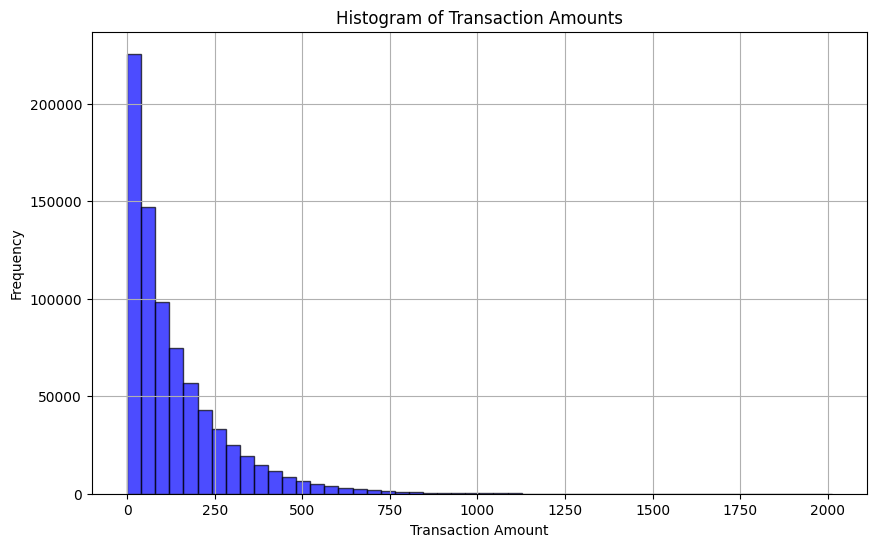

Transaction Amount Summary:
count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for transactionAmount
plt.figure(figsize=(10, 6))
plt.hist(df["transactionAmount"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Statistical description of transactionAmount
transaction_stats = df["transactionAmount"].describe()
print("Transaction Amount Summary:")
print(transaction_stats)

In [66]:
Cleaned_df = Cleaned_df.reset_index(drop=True)
display(Cleaned_df.head())

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,...,trans_weekday,trans_month,txn_date,daily_txn_count,validity_days,merchantName_FE,merchantCountryCode_LE,posEntryMode_LE,merchantCategoryCode_LE,transactionType_LE
0,101380713,10000.0,10000.00,2016-01-02 05:10:39,114.65,551,551,7553,0.00,0,...,5,1,2016-01-02,1,4171,1276,4,1,14,2
1,101380713,10000.0,9885.35,2016-01-04 03:10:44,433.50,551,551,7553,114.65,1,...,0,1,2016-01-04,1,4688,103,4,3,1,2
2,101380713,10000.0,9451.85,2016-01-11 18:00:07,0.46,551,551,7553,548.15,0,...,0,1,2016-01-11,1,6332,1330,4,2,14,2
3,101380713,10000.0,9451.39,2016-01-15 20:46:39,9.17,551,551,7553,548.61,1,...,4,1,2016-01-15,1,5267,101,4,1,1,2
4,101380713,10000.0,9442.22,2016-01-16 00:46:06,50.43,551,551,7553,557.78,0,...,5,1,2016-01-16,1,2406,1405,4,2,14,2


In [68]:
# Drop the 'Salary' column
Cleaned_df = Cleaned_df.drop(['cardCVV','transactionDateTime', 'txn_date' ,'expirationDateKeyInMatch'], axis=1)

The histogram above illustrates the distribution of transaction amounts and their frequency. The data shows that transaction peaks occur predominantly for amounts less than **250,** with a mean transaction value of **136.** Additionally, **75%** of users spend **191** or less on their transactions, indicating that the majority of users make transactions below **200**.

### 3.Model Developement and Evaluation Phase:

### Implementing Logistic Regression Model

Model Accuracy: 0.6523

Confusion Matrix:
 [[6794 3616]
 [  54   90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79     10410
           1       0.02      0.62      0.05       144

    accuracy                           0.65     10554
   macro avg       0.51      0.64      0.42     10554
weighted avg       0.98      0.65      0.78     10554



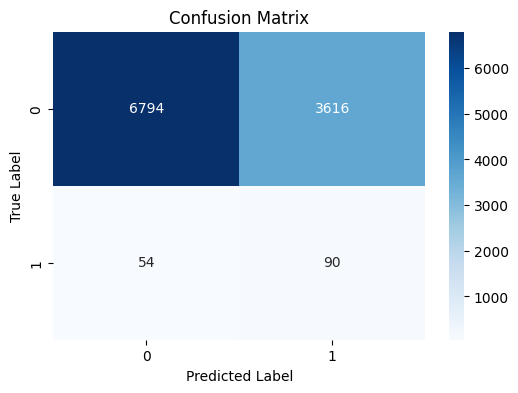

In [70]:
# Import necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = Cleaned_df.drop(columns=['isFraud'])  # Remove transactionDateTime
y = Cleaned_df['isFraud']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualization of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix and classification report reveal several key insights into our **baseline logistic regression model** for fraud detection.


In fraud detection, missing a fraudulent transaction (False Negative) is far more dangerous than flagging a legitimate one (False Positive).

Our primary goal is to minimize false negatives (FN).

True Negatives (TN) = 6794
→ These are legitimate transactions correctly identified as not fraud.

False Positives (FP) = 3616
→ These are legitimate transactions incorrectly flagged as fraud (false alarms).

False Negatives (FN) = 54
→ These are fraudulent transactions that the model missed (classified as not fraud).

True Positives (TP) = 90
→ These are fraudulent transactions correctly detected.

The model is catching 90 fraud cases, but it’s missing 54 fraud cases → recall is decent but not perfect.

The Model is incorrectly predicting legitimate transactions as fraudulent and also missing some fraud transactions, classifying it as non fraudulent.

The model is very imbalanced toward flagging too many transactions as fraud (lots of false positives).

### **Implementing Random Forest Model**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = Cleaned_df.drop(columns=['isFraud'])
y = Cleaned_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
roc_auc = roc_auc_score(y_test, y_proba)
print(roc_auc)


Confusion Matrix:
[[14865   738]
 [  141    87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15603
           1       0.11      0.38      0.17       228

    accuracy                           0.94     15831
   macro avg       0.55      0.67      0.57     15831
weighted avg       0.98      0.94      0.96     15831


ROC-AUC Score:
0.8213535183854657


Overall accuracy is high (94%), but it’s misleading because of severe class imbalance.

The model performs very well for legit transactions, but poorly for fraud detection (precision 0.11, recall 0.38).

ROC-AUC is more reliable than accuracy here:

If it’s low (<0.6) → model is weak at separating fraud from legit.

If it’s decent (>0.7) → model has potential, but you need to adjust threshold or resampling techniques.

The main issue: too many frauds missed (141) and too many false alarms (738) → not practical for a bank/fraud system.

If ROC-AUC is >0.8, it means your model can discriminate, but the chosen threshold is too high.

You may improve recall (catch more fraud) by lowering the decision threshold.

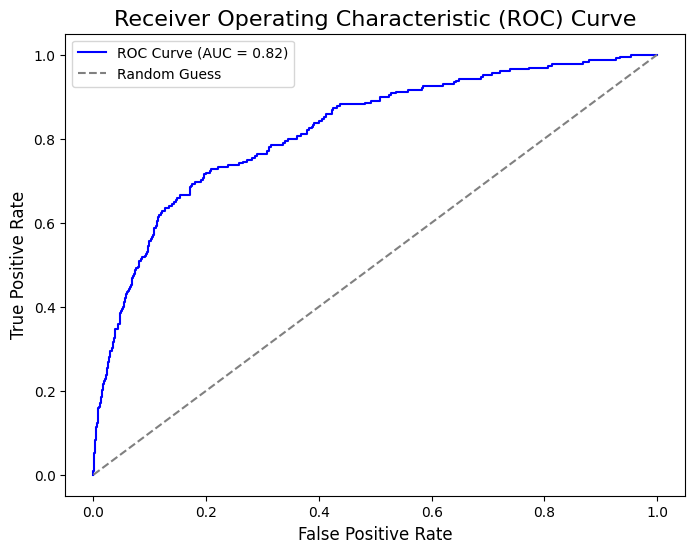

Best Threshold: 0.2858381823493353


In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.show()


# Get FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Youden's J statistic
youden_j = tpr - fpr

# Find the index of the best threshold
best_threshold_index = youden_j.argmax()
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)


In [75]:

X = Cleaned_df.drop(columns=['isFraud'])
y = Cleaned_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Adjust threshold
threshold = 0.30  # Set a new threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate metrics
print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nClassification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

Confusion Matrix with Adjusted Threshold:
[[12753  2850]
 [   69   159]]

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     15603
           1       0.05      0.70      0.10       228

    accuracy                           0.82     15831
   macro avg       0.52      0.76      0.50     15831
weighted avg       0.98      0.82      0.89     15831




Trade-off observed: Accuracy dropped, but recall for fraud improved significantly (38% - 70%). Good for fraud detection if the main business goal is to catch as many frauds as possible, even at the cost of false alarms.

This shows threshold tuning works (0.30 adjusted value), but now we need to balance precision vs recall more carefully.

Overall accuracy looks high at 94% initially, but that’s misleading because the dataset is highly imbalanced (fraud cases are rare).

After threshold adjustment, accuracy fell to 82%, but this actually represents a better trade-off because fraud detection improved.   

### **Which models works better?**

**Recommended Model: Adjusted Threshold Model with 0.30 (Model 3)**

**Why Choose This Model?**

Initial model: High accuracy but poor fraud detection → not reliable.

Fraud detection improved (recall ↑ from 38% → 70%). At the cost of more false alarms (precision ↓ from 11% → 5%). Overall, the model is now more sensitive to fraud but less precise.

This shows the precision–recall trade-off clearly.

## lets see which features are contributing most towards fraudulent activities

In [78]:
# Feature Importance (optional)
feature_importance = rf_model.feature_importances_
for name, importance in zip(X.columns, feature_importance):
    print(f"{name}: {importance:.4f}")

accountNumber: 0.0682
creditLimit: 0.0326
availableMoney: 0.0659
transactionAmount: 0.1596
enteredCVV: 0.0674
cardLast4Digits: 0.0632
currentBalance: 0.0681
cardPresent: 0.0149
trans_hour: 0.0462
trans_weekday: 0.0248
trans_month: 0.0405
daily_txn_count: 0.0547
validity_days: 0.0606
merchantName_FE: 0.0971
merchantCountryCode_LE: 0.0043
posEntryMode_LE: 0.0600
merchantCategoryCode_LE: 0.0691
transactionType_LE: 0.0029


**Top predictors of fraud:**

**transactionAmount (0.1596)** is the strongest feature → fraud is often associated with unusual transaction amounts.

**merchantName_FE (0.0971)** is also highly important → some merchants or merchant groups may be associated with more fraud attempts.

Other strong signals: **merchantCategoryCode_LE (0.0691),** **accountNumber (0.0682),** **currentBalance (0.0681),** **enteredCVV (0.0674).**

**Moderate predictors:**

Features like validity_days, posEntryMode_LE, availableMoney, and daily_txn_count contribute meaningfully but less than the top ones.

### **Conclusion:**

From our Exploratory Data Analysis, Model Performance and Feature Importance we have below insights and Recommendations for Business.

-  Account number, Transaction Amount, Merchant Category and MerchantName are them most crucial features which are prone towards fraudelent transactions.



-  If we dig deeper from our earlier visualisation we can see that Account number 380680241 have had  907 reverse transactions and (#882815134) had 384 reverse trasactions. These two accounts needs further investigation in terms of Transaction Amount an  frequency of reversal within days or hours.

-  Also, the merchants like Lyft with  692, Uber with 689, alibaba.com with 499 and ebay.com with 491 are topmost merchant which usually are Ecommerce platform. Ridesharing services and Online trading platform have most of transaction reversal, which requires further investigation and monitoring.



## **THANKYOU**